In [21]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']= (20.0,10.0)

#Reading data
data = pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [22]:
#collecting X and Y
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [13]:
#mean of X and Y
mean_x=np.mean(X)
mean_y=np.mean(Y)

#total number of values
m=len(X)

#using the formular to calculate bi and b2
numer=0
denom=0
for i in range (m):
    numer += (X[i] - mean_x) * (Y[i]-mean_y)
    denom += (X[i] - mean_x)**2
b1=numer/denom
b0=mean_y -(b1* mean_x)

#print coefficient 
print(b1,b0)



0.26342933948939945 325.57342104944223


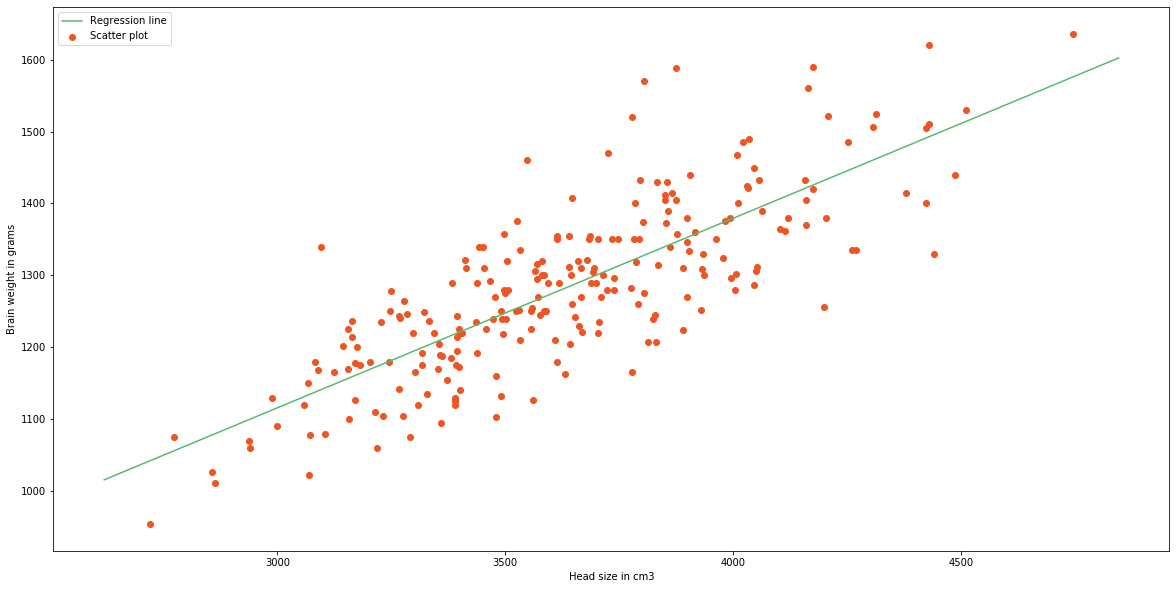

In [23]:

#plotting values and regression line
max_x=np.max(X) +100
min_x=np.min(X) -100

#calculating line values x and y
x=np.linspace(min_x, max_x, 1000)
y=b0 + b1 * x

#ploting line
plt.plot(x,y,color='#58b970', label='Regression line')

#ploting scatter
plt.scatter(X,Y, c='#ef5423', label='Scatter plot')

plt.xlabel('Head size in cm3')
plt.ylabel('Brain weight in grams')
plt.legend()
plt.show()

In [24]:
ss_t=0
ss_r=0
for i in range (m):
    y_pred=b0 +b1 *X[i]
    ss_t += (Y[i] -mean_y)**2
    ss_r += (Y[i] -y_pred)**2
r2= 1-(ss_r/ss_t)
print(r2)


0.6393117199570003


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X=X.reshape((m,1))

#Create model
reg=LinearRegression()

#Fitting traning data
reg =reg.fit(X,Y)

#Y prediction
Y_pred =reg.predict(X)

#Calculate R2 score
r2_score =reg.score(X,Y)
print (r2_score)

0.639311719957
